## Semana 2

### Bibliotecas e dados brutos

In [2]:
# bibliotecas usadas:
import pandas as pd # manipulação dos dados
import seaborn as sns # gráficos

# opcional (ocutar alguns alertas)
import warnings
warnings.filterwarnings('ignore')

In [3]:
dados_brutos = pd.read_csv('tabela_aluracash.csv', sep=';')
dados_brutos.sample(5) #amostra dos dados brutos

,PESSOA,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,EMPRESTIMO,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,SOLICITACAO,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
30479,rOlUClIr-1paq,24.0,234000.0,Própria,8.0,U7M23f1z-F0z0,Melhora do lar,B,20000.0,8.88,0.0,0.09,kGmG1KrK-mxkS,0.0,4
17675,fec6wxYQ-o88K,27.0,225000.0,Hipotecada,1.0,MdpGG7C2-BJhR,Empreendimento,B,14000.0,NaN,0.0,0.06,kGscnGLH-uoof,0.0,7
27578,SdJkUW74-cEeP,31.0,40000.0,Hipotecada,5.0,EEfMKR49-B6rO,Melhora do lar,B,11000.0,9.99,0.0,0.28,8RO2YO9a-hFC3,0.0,8
27262,nuzcrO92-ntbk,26.0,40000.0,Alugada,0.0,4FPbhwKR-AwXs,Médico,A,4500.0,7.74,0.0,0.11,soQO2Ccn-et6a,0.0,2
29154,pyhnsnk4-Ds8K,23.0,48000.0,Alugada,0.0,dTEXL4IA-BdAu,Empreendimento,B,10000.0,9.25,0.0,0.21,txiySRQ6-La0C,0.0,3


### Informações do dataset

#### Nº de linhas e colunas

In [4]:
dados_brutos.shape

(34485, 15)

#### Colunas + tipos das colunas

In [5]:
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34485 entries, 0 to 34484
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PESSOA                       34485 non-null  object 
 1   IDADE                        34165 non-null  float64
 2   RENDIMENTO_ANUAL             34150 non-null  float64
 3   SITUACAO_PROPRIEDADE         34154 non-null  object 
 4   ANOS_TRABALHADOS             33231 non-null  float64
 5   EMPRESTIMO                   34485 non-null  object 
 6   MOTIVO_EMPRESTIMO            34174 non-null  object 
 7   PONTUACAO                    34176 non-null  object 
 8   VALOR_EMPRESTIMO             34154 non-null  float64
 9   JUROS                        30859 non-null  float64
 10  POSSIB_INADIMPLENCIA         34142 non-null  float64
 11  EMPRESTIMO_PERC_RENDA_ANUAL  34170 non-null  float64
 12  SOLICITACAO                  34485 non-null  object 
 13  INADIMPLENTE    

#### Dados nulos por colunas

In [6]:
dados_brutos.isnull().sum()

PESSOA                            0
IDADE                           320
RENDIMENTO_ANUAL                335
SITUACAO_PROPRIEDADE            331
ANOS_TRABALHADOS               1254
EMPRESTIMO                        0
MOTIVO_EMPRESTIMO               311
PONTUACAO                       309
VALOR_EMPRESTIMO                331
JUROS                          3626
POSSIB_INADIMPLENCIA            343
EMPRESTIMO_PERC_RENDA_ANUAL     315
SOLICITACAO                       0
INADIMPLENTE                    366
ANOS_PRIMEIRO_CREDITO             0
dtype: int64

#### Dados vazios (tipo string) por colunas

In [7]:
(dados_brutos == '').sum()

PESSOA                         0
IDADE                          0
RENDIMENTO_ANUAL               0
SITUACAO_PROPRIEDADE           0
ANOS_TRABALHADOS               0
EMPRESTIMO                     0
MOTIVO_EMPRESTIMO              0
PONTUACAO                      0
VALOR_EMPRESTIMO               0
JUROS                          0
POSSIB_INADIMPLENCIA           0
EMPRESTIMO_PERC_RENDA_ANUAL    0
SOLICITACAO                    0
INADIMPLENTE                   0
ANOS_PRIMEIRO_CREDITO          0
dtype: int64

#### Criando um subset com as colunes necessárias

In [41]:
dados = dados_brutos[[ 'IDADE', 'RENDIMENTO_ANUAL', 'SITUACAO_PROPRIEDADE',
       'ANOS_TRABALHADOS', 'MOTIVO_EMPRESTIMO', 'PONTUACAO',
       'VALOR_EMPRESTIMO', 'JUROS', 'POSSIB_INADIMPLENCIA',
       'EMPRESTIMO_PERC_RENDA_ANUAL', 'INADIMPLENTE',
       'ANOS_PRIMEIRO_CREDITO']]
dados.sample(5)

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
20786,23.0,65074.0,Alugada,0.0,Educativo,D,6000.0,14.42,1.0,0.09,1.0,3
17608,NaN,116000.0,Hipotecada,3.0,Pagamento de débitos,B,12000.0,NaN,1.0,0.10,0.0,7
15951,22.0,77000.0,Hipotecada,6.0,Empreendimento,A,12400.0,7.51,0.0,0.16,0.0,2
15947,23.0,55000.0,Hipotecada,0.0,Pessoal,A,2000.0,NaN,0.0,0.04,0.0,2
16121,23.0,54000.0,Alugada,7.0,Empreendimento,B,15550.0,11.71,0.0,0.29,0.0,4


### Remoção de dados nulos

Será removida linhas com 2 ou mais dados nulos.

In [42]:
for j in dados.columns:
    for i in dados.columns:
        if i == j:
            pass
        else:
            dados_nulos = dados[dados[[i, j]].isnull().all(1)]
            dados = dados.drop(dados_nulos.index)
            
print(dados.shape)

(32669, 12)


Menos de 2 mil linhas foram eliminadas.

In [43]:
dados.isnull().sum()

IDADE                            16
RENDIMENTO_ANUAL                 12
SITUACAO_PROPRIEDADE             20
ANOS_TRABALHADOS                839
MOTIVO_EMPRESTIMO                11
PONTUACAO                        15
VALOR_EMPRESTIMO                  9
JUROS                          3065
POSSIB_INADIMPLENCIA             11
EMPRESTIMO_PERC_RENDA_ANUAL      11
INADIMPLENTE                     22
ANOS_PRIMEIRO_CREDITO             0
dtype: int64

Principal problema está nas colunas **ANOS_TRABALHADOS** e **JUROS**.

Analisando as variáveis categóricas.

#### SITUACAO_PROPRIEDADE

In [44]:
dados['SITUACAO_PROPRIEDADE'].sort_values().unique()

array(['Alugada', 'Hipotecada', 'Outros', 'Própria', nan], dtype=object)

Foi preferível preencher os dados nulos com 'Desconhecida'.

In [45]:
dados['SITUACAO_PROPRIEDADE'] = dados['SITUACAO_PROPRIEDADE'].fillna('Desconhecida')
dados['SITUACAO_PROPRIEDADE'].value_counts(normalize = True) *100

Alugada         50.469864
Hipotecada      41.234810
Própria          7.906578
Outros           0.327528
Desconhecida     0.061220
Name: SITUACAO_PROPRIEDADE, dtype: float64

#### MOTIVO_EMPRESTIMO

In [46]:
dados['MOTIVO_EMPRESTIMO'].sort_values().unique()

array(['Educativo', 'Empreendimento', 'Melhora do lar', 'Médico',
       'Pagamento de débitos', 'Pessoal', nan], dtype=object)

In [47]:
dados['MOTIVO_EMPRESTIMO'] = dados['MOTIVO_EMPRESTIMO'].fillna('Desconhecido')
dados['MOTIVO_EMPRESTIMO'].value_counts(normalize = True) *100

Educativo               19.780220
Médico                  18.620099
Empreendimento          17.582418
Pessoal                 16.905935
Pagamento de débitos    16.006000
Melhora do lar          11.071658
Desconhecido             0.033671
Name: MOTIVO_EMPRESTIMO, dtype: float64

#### PONTUACAO

In [48]:
dados['PONTUACAO'].sort_values().unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', nan], dtype=object)

Foi criada a categoria 'X' para a coluna **PONTUACAO**.

In [49]:
dados['PONTUACAO'] = dados['PONTUACAO'].fillna('X')
dados['PONTUACAO'].value_counts(normalize = True) *100

A    33.009887
B    32.048731
C    19.856745
D    11.132878
E     2.969176
F     0.740763
G     0.195904
X     0.045915
Name: PONTUACAO, dtype: float64

Analisando as variáveis numéricas.

In [50]:
dados.isnull().sum()

IDADE                            16
RENDIMENTO_ANUAL                 12
SITUACAO_PROPRIEDADE              0
ANOS_TRABALHADOS                839
MOTIVO_EMPRESTIMO                 0
PONTUACAO                         0
VALOR_EMPRESTIMO                  9
JUROS                          3065
POSSIB_INADIMPLENCIA             11
EMPRESTIMO_PERC_RENDA_ANUAL      11
INADIMPLENTE                     22
ANOS_PRIMEIRO_CREDITO             0
dtype: int64

Os dados nulos foram preenchidos utilizando o método 'ffill'.

In [51]:
dados = dados.fillna(method="ffill")
dados.isnull().sum()

IDADE                          0
RENDIMENTO_ANUAL               0
SITUACAO_PROPRIEDADE           0
ANOS_TRABALHADOS               0
MOTIVO_EMPRESTIMO              0
PONTUACAO                      0
VALOR_EMPRESTIMO               0
JUROS                          0
POSSIB_INADIMPLENCIA           0
EMPRESTIMO_PERC_RENDA_ANUAL    0
INADIMPLENTE                   0
ANOS_PRIMEIRO_CREDITO          0
dtype: int64

### Tratamento de outliers

A variáveis categórias não serão tratadas aqui.

#### IDADE

In [52]:
dados['IDADE'].sort_values().unique()

array([ 20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,
        31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,
        42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,
        53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,
        64.,  65.,  66.,  67.,  69.,  70.,  73.,  76.,  78.,  80.,  84.,
        94., 123., 144.])

Foi detectada idades superior a 120 anos.

In [53]:
dados[dados['IDADE'] > 120]

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
12360,144.0,6000000.0,Hipotecada,12.0,Pessoal,C,5000.0,12.73,0.0,0.00,0.0,25
18648,123.0,80004.0,Alugada,2.0,Educativo,B,20400.0,10.25,0.0,0.25,0.0,3
19597,144.0,200000.0,Hipotecada,4.0,Educativo,B,6000.0,11.86,0.0,0.03,0.0,2
23469,123.0,78000.0,Alugada,7.0,Empreendimento,B,20000.0,9.70,0.0,0.26,0.0,4
32584,144.0,250000.0,Alugada,4.0,Empreendimento,C,4800.0,13.57,0.0,0.02,0.0,3


O peso de 5 linhas num dataset de mais de 34 mil linhas é extremamente pequeno, essas linhas foram excuídas.

In [54]:
dados = dados.drop(dados[dados['IDADE'] > 120].index)
dados[dados['IDADE'] > 120]

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO


#### RENDIMENTO_ANUAL

In [55]:
dados['RENDIMENTO_ANUAL'].sort_values().unique()

array([   4000.,    4080.,    4200., ..., 1782000., 1900000., 2039784.])

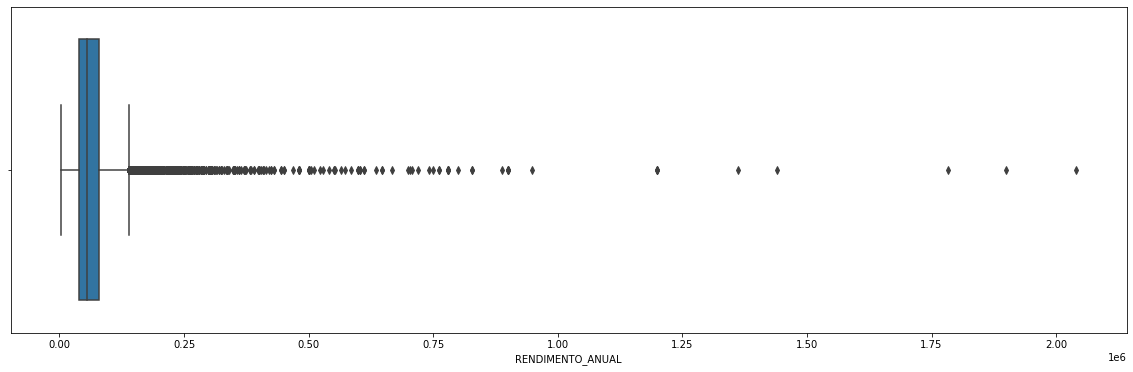

In [56]:
ax = sns.boxplot(x=dados['RENDIMENTO_ANUAL'])
ax.figure.set_size_inches(20, 6)

In [58]:
dados[dados['RENDIMENTO_ANUAL'] > 1000000]

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
6584,40.0,1200000.0,Hipotecada,1.0,Médico,A,10000.0,14.65,0.0,0.01,0.0,16
9073,42.0,2039784.0,Alugada,0.0,Empreendimento,C,8450.0,12.29,0.0,0.00,1.0,15
12606,47.0,1362000.0,Hipotecada,9.0,Empreendimento,A,6600.0,7.74,0.0,0.00,0.0,17
15434,36.0,1200000.0,Própria,16.0,Médico,A,10000.0,6.54,0.0,0.01,0.0,11
19815,63.0,1782000.0,Alugada,13.0,Educativo,C,12025.0,14.27,0.0,0.01,0.0,30
28515,32.0,1200000.0,Hipotecada,1.0,Empreendimento,A,12000.0,7.51,0.0,0.01,0.0,8
28779,60.0,1900000.0,Hipotecada,5.0,Pessoal,A,1500.0,14.38,0.0,0.00,0.0,21
29934,44.0,1440000.0,Hipotecada,7.0,Pagamento de débitos,A,6400.0,7.40,0.0,0.00,0.0,15


Há pessoas com rendimento anual superior a 1 milhão.

#### ANOS_TRABALHADOS

In [59]:
dados['ANOS_TRABALHADOS'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  34.,
        38.,  41., 123.])

Há dois cidadãos que trabalharam por "123 anos", definitivamente são um outliers. 

In [60]:
dados[dados['ANOS_TRABALHADOS'] > 100]

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
25055,22.0,59000.0,Alugada,123.0,Pessoal,D,35000.0,16.02,1.0,0.59,1.0,3
31592,21.0,192000.0,Hipotecada,123.0,Empreendimento,A,20000.0,6.54,0.0,0.10,0.0,4


In [61]:
dados = dados.drop(dados[dados['ANOS_TRABALHADOS'] > 120].index)
dados[dados['ANOS_TRABALHADOS'] > 120]

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO


#### VALOR_EMPRESTIMO

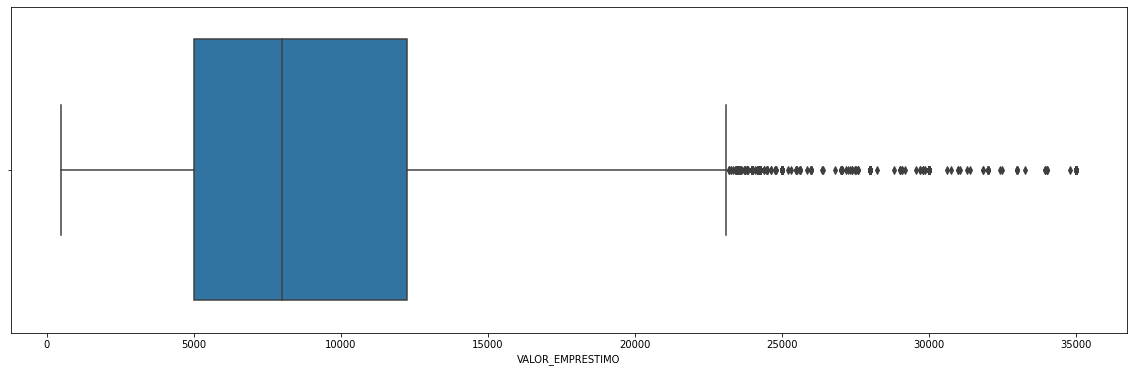

In [62]:
ax = sns.boxplot(x=dados['VALOR_EMPRESTIMO'])
ax.figure.set_size_inches(20, 6)

Não vejo nenhum problema em pegar empréstimos com valores elevados.

#### JUROS

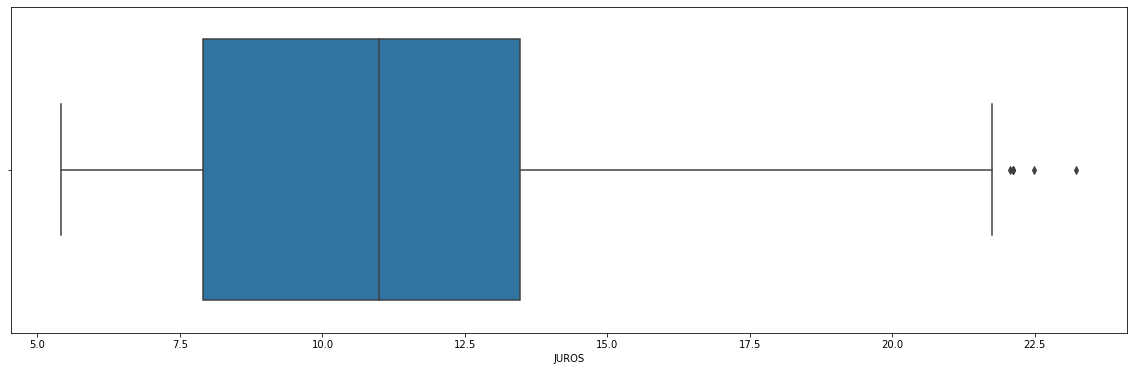

In [63]:
ax = sns.boxplot(x=dados['JUROS'])
ax.figure.set_size_inches(20, 6)

Nada anormal com os juros.

#### EMPRESTIMO_PERC_RENDA_ANUAL

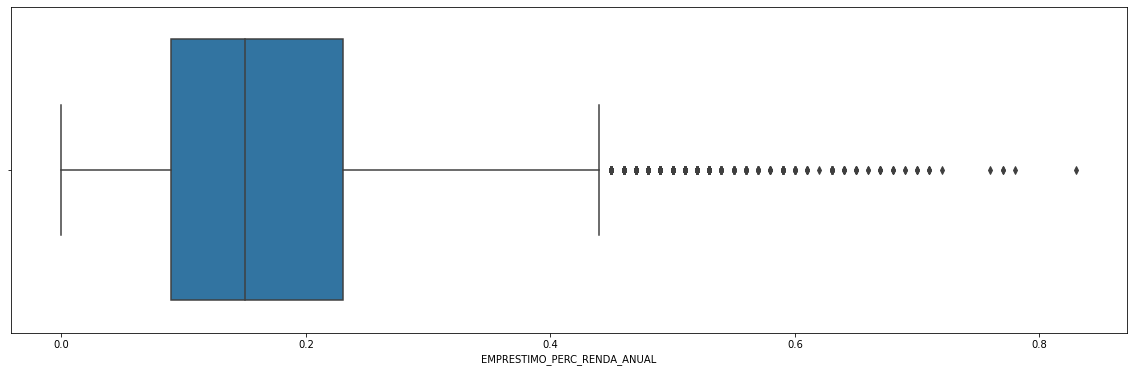

In [64]:
ax = sns.boxplot(x=dados['EMPRESTIMO_PERC_RENDA_ANUAL'])
ax.figure.set_size_inches(20, 6)

Nada anormal aqui.

#### ANOS_PRIMEIRO_CREDITO

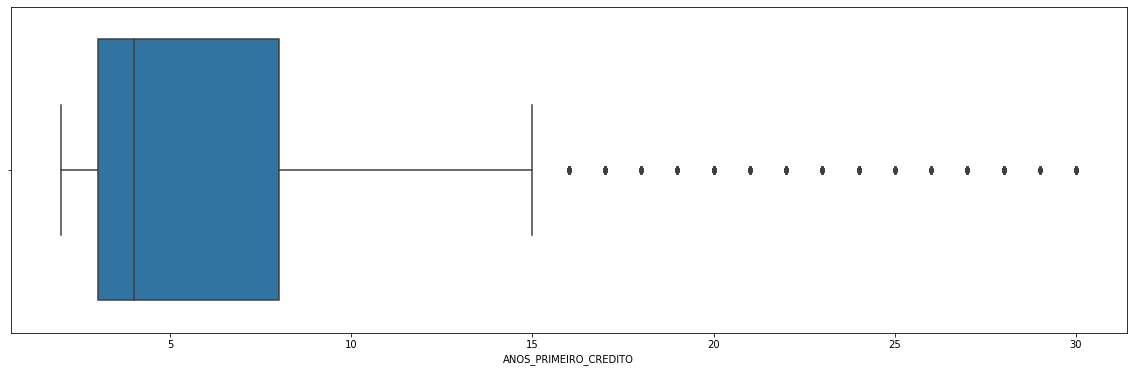

In [65]:
ax = sns.boxplot(x=dados['ANOS_PRIMEIRO_CREDITO'])
ax.figure.set_size_inches(20, 6)

Nada anormal aqui.

#### Resultado final

In [66]:
dados.shape

(32662, 12)

O resultado final é uma tabela com 32662 linhas.

In [68]:
dados_brutos.shape[0]- dados.shape[0]

1823

1823 linhas foram eliminadas.

### Analisar a correlação das variáveis

## Notebook WIP...

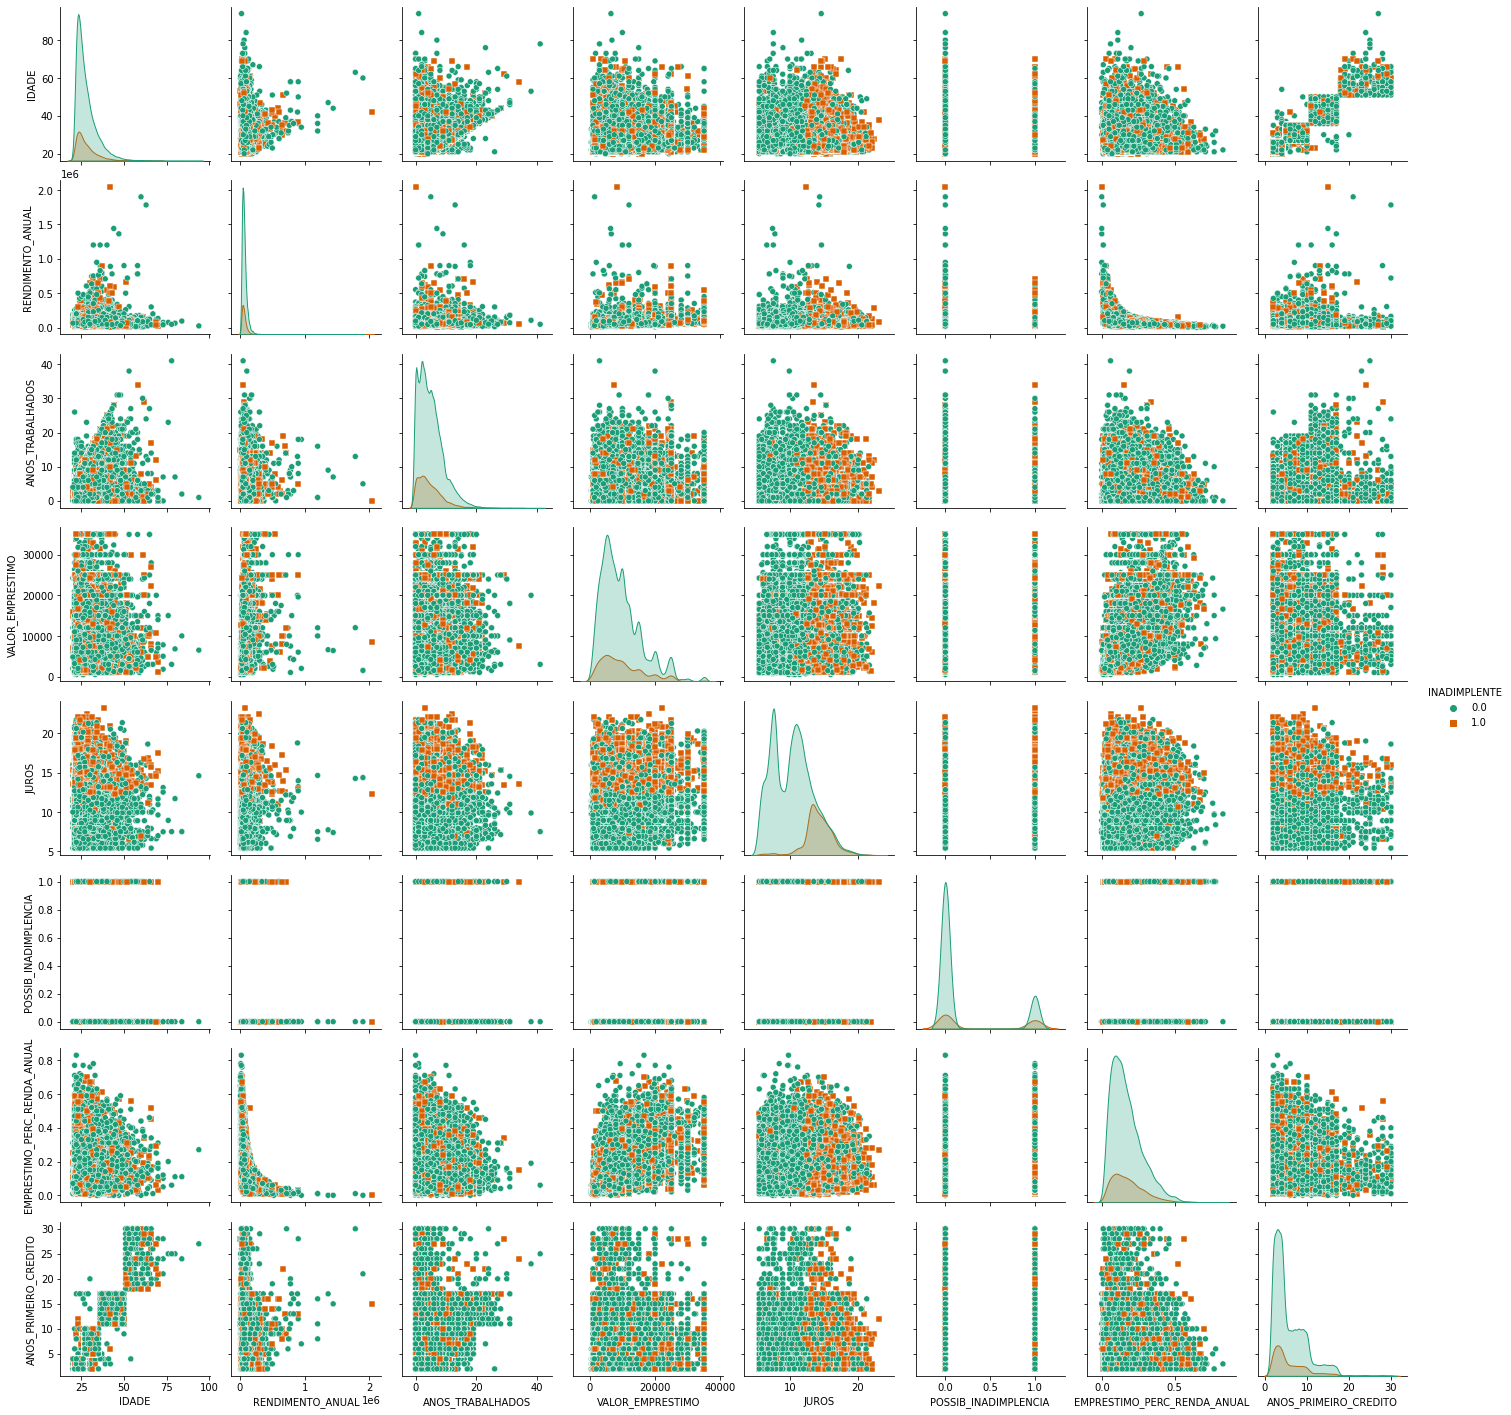

In [70]:
sns.pairplot(dados, hue='INADIMPLENTE', markers=["o", "s"], palette='Dark2')

In [71]:
dados.corr()

,IDADE,RENDIMENTO_ANUAL,ANOS_TRABALHADOS,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
IDADE,1.000000,0.140374,0.168456,0.051828,0.013102,-0.020246,-0.041165,0.006565,0.874492
RENDIMENTO_ANUAL,0.140374,1.000000,0.152353,0.315828,0.001791,-0.167734,-0.293480,-0.002939,0.122788
ANOS_TRABALHADOS,0.168456,0.152353,1.000000,0.108270,-0.052594,-0.084903,-0.058264,-0.029011,0.145305
VALOR_EMPRESTIMO,0.051828,0.315828,0.108270,1.000000,0.133003,0.105551,0.572496,0.038997,0.041864
JUROS,0.013102,0.001791,-0.052594,0.133003,1.000000,0.304524,0.109035,0.455584,0.015850
POSSIB_INADIMPLENCIA,-0.020246,-0.167734,-0.084903,0.105551,0.304524,1.000000,0.379165,0.178919,-0.015775
EMPRESTIMO_PERC_RENDA_ANUAL,-0.041165,-0.293480,-0.058264,0.572496,0.109035,0.379165,1.000000,0.036062,-0.031845
INADIMPLENTE,0.006565,-0.002939,-0.029011,0.038997,0.455584,0.178919,0.036062,1.000000,0.004525
ANOS_PRIMEIRO_CREDITO,0.874492,0.122788,0.145305,0.041864,0.015850,-0.015775,-0.031845,0.004525,1.000000


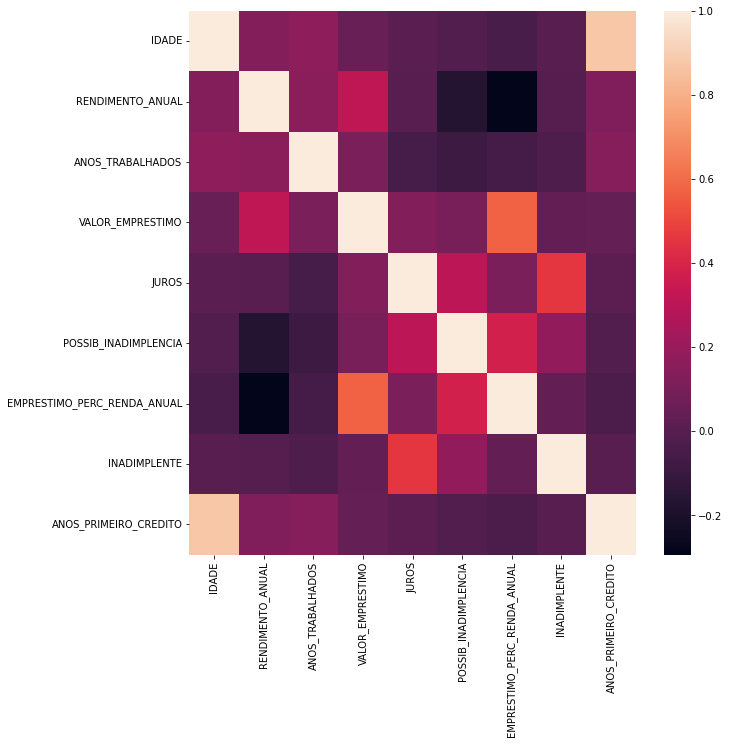

In [75]:
ax = sns.heatmap(dados.corr())
ax.figure.set_size_inches(10,10)